<a href="https://colab.research.google.com/github/deltorobarba/machinelearning/blob/master/newton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Newton (Raphson's) Method**

In [0]:
import tensorflow as tf
import datetime, os

# Populating the interactive namespace from numpy and matplotlib
# %pylab inline
import numpy as np
from mpl_toolkits import mplot3d
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np 
import math 

print(tf.__version__)

2.2.0


**Finding roots of non linear functions (1D)**

Consider the following polynomial function which is continuous, differentiable and well behaved. It is an interesting example to use when testing root finding algorithms because it exhibits several *basins of attractions* in 1D. A basin of attraction is a set of initial values leading to the same solution (i.e. root in this case), see [here][1] for some details. In this example, different starting points will lead to different solutions, or in some cases no solutions at all when the algorithm "blows up"

The next section will investigate different methods of finding the **roots** of:

$f(x) = x^3 - 2x^2 - 11x + 12$

$f'(x) = 3x^2 - 4x - 11$

[1]: https://fr.mathworks.com/help/gads/what-is-global-optimization.html#bsbalkx-1

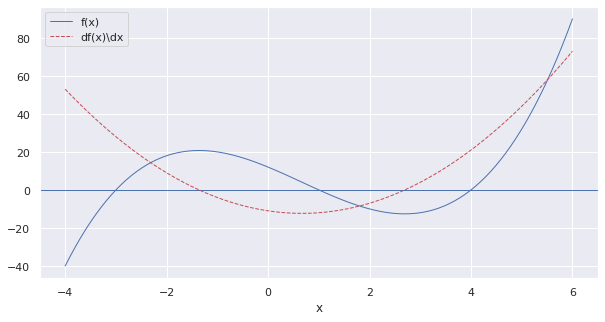

In [0]:
import seaborn as sns

sns.set(rc={'figure.figsize':(10, 5), "lines.linewidth": 1.0})

#Defining the functions and its first derivative
def f(x):
    return x**3 - 2*x**2 - 11*x + 12

def dfdx(x):
    return 3*x**2 - 4*x - 11
    
#Initializing data
x = np.linspace(-4,6,100)
y = f(x)
y_dash = dfdx(x)

#Plotting the function and its derivative
#fig = plt.figure()
plt.xlabel('x')
plt.axhline(0)
plt.plot(x,y, label = 'f(x)')
plt.plot(x,y_dash, '--r', label = 'df(x)\dx')
plt.legend()
plt.show()

### **Bisection Method**

The bisection method is one of the simplest methods for finding zeroes of a non-linear function. It is guaranteed to find a root - but it can be slow. The main idea comes from the intermediate value theorem: If $f(a)$ and $f(b)$ have different signs and $f$ is continous, then f must have a zero between a and b. We evaluate the function at the midpoint, $c=\frac{1}{2}(a+b).$ $f(c)$ is either zero, has the same sign as f(a) or the same sign as $f(b)$. Suppose $f(c)$ has the same sign as f(a) (as pictured below). We then repeat the process on the interval $[c,b]$.

In [0]:
def Bisection_Search(func,a,b,epsilon,nMax = 1000):
    #Initializating variables, iter_x, iter_x are used to plot results
    i = 0
    iter_x, iter_y, iter_count = np.empty(0),np.empty(0),np.empty(0)
    
    #Looping condition to ensure that loop is not infinite
    while i < nMax:
        i +=1
        c = .5 *(a + b)
        
        iter_x = np.append(iter_x,c)
        iter_y = np.append(iter_y,func(c))
        iter_count = np.append(iter_count ,i)
        
        if np.abs(func(c)) < epsilon:
            return c, iter_x, iter_y, iter_count
        elif np.sign(func(c)) == np.sign(func(a)): 
            a = c
        elif np.sign(func(c)) == np.sign(func(b)): 
            b = c

root,iter_x,iter_y, iter_count = Bisection_Search(f,-5,-2,0.01)

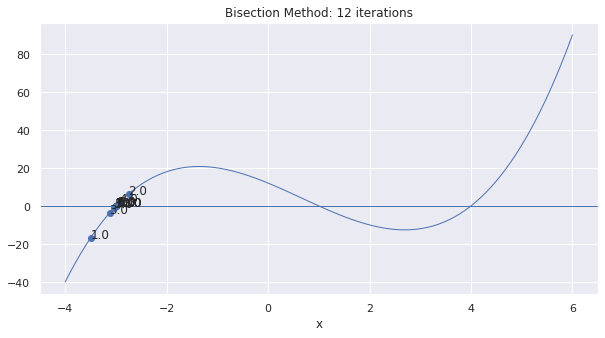

In [0]:
#Plotting the iterations and intermediate values
fig, ax = plt.subplots() 
ax.set_xlabel('x')
ax.axhline(0)
ax.plot(x,y)
ax.scatter(x = iter_x,y = iter_y)
ax.set_title('Bisection Method: {} iterations'.format(len(iter_count)))

#Loop to add text annotations to the iteration points
for i, txt in enumerate(iter_count):
    ax.annotate(txt, (iter_x[i], iter_y[i]))
    
plt.show()

### **Newton (Raphson's) Method**

Newton's method, also known as Newton-Raphson's method, is a very famous and widely used method for solving nonlinear algebraic equations. Compared to the other methods we will consider, it is generally the fastest one (usually by far). It does not guarantee that an existing solution will be found, however.

Newton's method is normally formulated with an iteration index n: 

$x_{n+1} = x_n - \large \frac{f(x_n)}{f'(x_n)}$

To avoid storing intermediate values in memory, one can overwrite the previous value and work with a single variable: 

$x := x - \frac{f(x)}{f'(x)}$

In this example:

$f(x) = x^3 - 2x^2 - 11x + 12$

$f'(x) = 3x^2 - 4x - 11$


In [0]:
def Newton_Raphson(func, deriv, x, epsilon, nMax = 100):
    #Initializating variables, iter_x, iter_x are used to plot results
    i = 0
    iter_x, iter_y, iter_count = np.empty(0),np.empty(0),np.empty(0)
    
    error = x - (x - func(x)/ deriv(x))
    
    #Looping as long as error is greater than epsilon
    while np.abs(error) > epsilon and i < nMax:
        i +=1
        iter_x = np.append(iter_x,x)
        iter_y = np.append(iter_y,func(x))
        iter_count = np.append(iter_count ,i)

        error = x - (x - func(x)/ deriv(x))
        x = x - func(x)/ deriv(x)
    
    
    return x, iter_x, iter_y, iter_count


root,iter_x,iter_y, iter_count = Newton_Raphson(f,dfdx,-2,0.01)

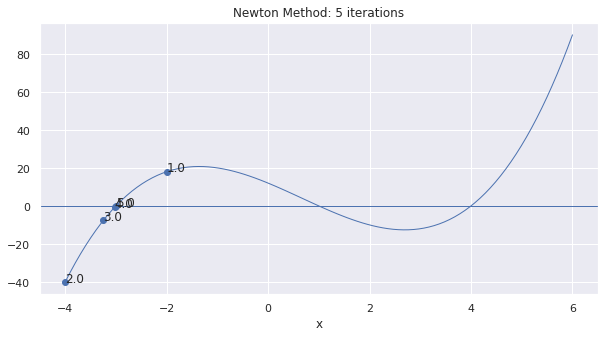

In [0]:
#Plotting the iterations and intermediate values
fig, ax = plt.subplots() 
ax.set_xlabel('x')
ax.axhline(0)
ax.plot(x,y)
ax.scatter(x = iter_x,y = iter_y)
ax.set_title('Newton Method: {} iterations'.format(len(iter_count)))

for i, txt in enumerate(iter_count):
    ax.annotate(txt, (iter_x[i], iter_y[i]))
    
plt.show()

In [0]:
# Newton Raphson's using Scipy
# Similar results are obtained using Scipy's built in optimizer

import scipy.optimize
scipy.optimize.newton(f,6,dfdx)

4.0

### **Secant method**

When finding the derivative $f′(x)$ in Newton's method is problematic, or when function evaluations take too long; we may adjust the method slightly. Instead of using tangent lines to the graph we may use secants. The approach is referred to as the secant method. 

The idea of the secant method is to think as in Newton's method, but instead of using $f′(x_n)$, we approximate this derivative by a finite difference or the secant, i.e., the slope of the straight line that goes through the two most recent approximations $x_n$ and $x_n{−1}$. This slope reads

$f'(x_n) \approx \large \frac{f(x_n) - f(x_{n-1})}{x_n - x_{n-1}}$

Inserting this expression for $f'(x_n)$ into Newton's method simply gives us the secant method:

$x_{n+1} = x_n - f(x_n) \times \large \frac{x_n - x_{n-1}}{f(x_n) - f(x_{n-1})}$

As with the Bisection Search - the secant method requires *two* starting points

In [0]:
def Secant_method(func, x0,x1, epsilon, nMax = 100):
    #Initialization
    i = 0
    x2 = 0
    iter_x, iter_y, iter_count = np.empty(0),np.empty(0),np.empty(0)
    error = 100
    
    x2 = x1 - func(x1) * ((x1 - x0 ) / (func(x1) - func(x0))) 
    
    #Looping as long as error is greater than epsilon
    while np.abs(error) > epsilon and i < nMax:
        
        #Variables for plotting
        i +=1  
        iter_x = np.append(iter_x,x2)
        iter_y = np.append(iter_y,func(x2))
        iter_count = np.append(iter_count ,i)
        
        # Calculate new value
        x2 = x1 - func(x1) * ((x1 - x0 ) / (func(x1) - func(x0))) 
        error = x2 - x1
        x0 = x1
        x1 = x2
   
    return x2, iter_x, iter_y, iter_count


root,iter_x,iter_y, iter_count = Secant_method(f,-5,-2,0.01)

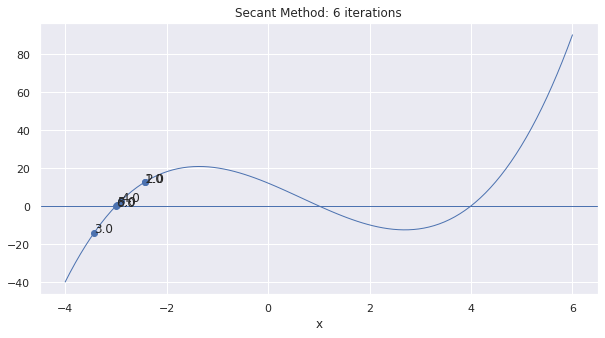

In [0]:
#Plotting the iterations and intermediate values
fig, ax = plt.subplots() 
ax.set_xlabel('x')
ax.axhline(0)
ax.plot(x,y)
ax.scatter(x = iter_x,y = iter_y)
ax.set_title('Secant Method: {} iterations'.format(len(iter_count)))

for i, txt in enumerate(iter_count):
    ax.annotate(txt, (iter_x[i], iter_y[i]))
    
plt.show()